In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_excel(r"D:\QUANTUM_ANALYTICS_COURSE\Python\Unicorn_Companies.xlsx")
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,1905-07-04,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,1905-06-24,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,1905-06-30,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,1905-07-02,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,1905-06-27,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,1905-07-04,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,1905-07-07,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,1905-07-10,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,1905-06-27,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
# to check the head of my dataset
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Dataset Inspection

In [4]:
# I also checked the shape of my dataset
df.shape

(1074, 10)

In [22]:
# I checked the information my dataset contained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   object        
 9   Select Investors  1074 non-null   object        
dtypes: datetime64[ns](2), object(8)
memory usage: 84.0+ KB


In [23]:
df.describe()

,Date Joined,Year Founded
count,1074,1074
mean,2020-05-19 15:35:51.955307264,1905-07-04 21:29:49.944134144
min,2007-07-02 00:00:00,1905-04-02 00:00:00
25%,2019-05-20 06:00:00,1905-07-03 00:00:00
50%,2021-03-29 00:00:00,1905-07-06 00:00:00
75%,2021-09-19 18:00:00,1905-07-08 00:00:00
max,2022-04-05 00:00:00,1905-07-13 00:00:00


In [7]:
# to check for the number of columns
df.columns.tolist()

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors']

In [8]:
# Now I checked for the missing values on each column and it should be summed
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

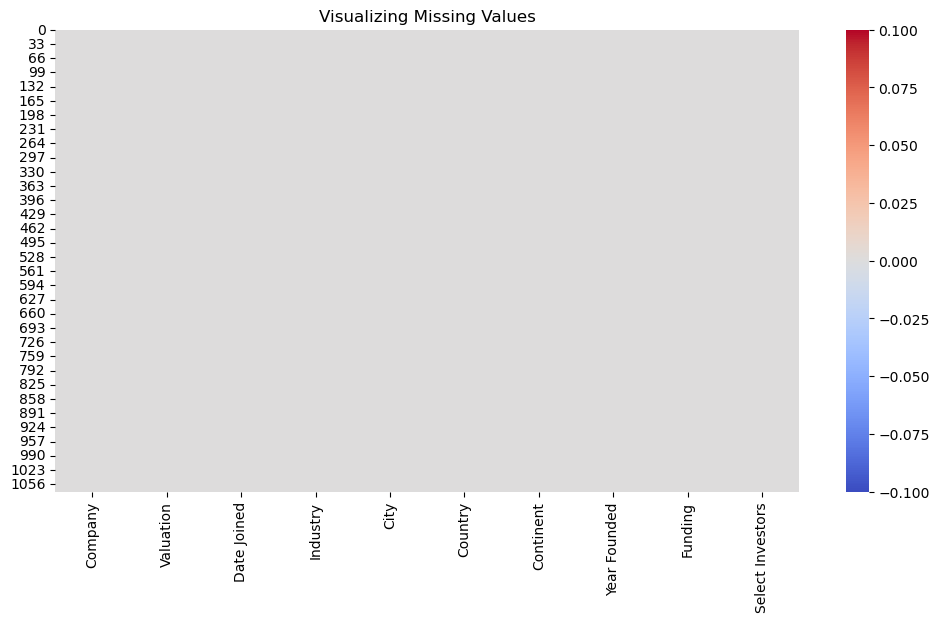

In [9]:
# I got to know city and selected Investors had null values and I need to work on them.so I will visualize it.
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.title('Visualizing Missing Values')
plt.show()

In [19]:
# check the columns that are categorical
cat_cols = df.select_dtypes(include = ['category', 'object']).columns.tolist()
cat_cols

['Company',
 'Valuation',
 'Industry',
 'City',
 'Country',
 'Continent',
 'Funding',
 'Select Investors']

In [20]:
# value counts for categorical columns to check for consistencies, Data validation
for column in cat_cols:
    print(df[column].value_counts())

Company
Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: count, Length: 1073, dtype: int64
Valuation
$1B      471
$2B      248
$3B      115
$4B       72
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$32B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: count, dtype: int64
Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & d

In [17]:
# check the columns that are numerical
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['Year Founded']

In [14]:
 #fill the 'NA' with 'Undisclosed'
df['City'] = df['City'].replace('NaN', 'Undisclosed')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [11]:
 #fill the 'NA' with 'Undisclosed'
df['Select Investors'] = df['Select Investors'].replace('NaN', 'Undisclosed')

In [13]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [70]:
#To perform the analysis on the valuation of the unicorn companies**
Valuations = df ['Valuation']
# I now generated a descriptive statistics** which explains that...
print(Valuations.describe())

count    1074.000000
mean        3.455307
std         8.547022
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: Valuation, dtype: float64


### The selected text provides a statistical summary of the 'Valuation' column from a dataset, likely representing the valuations of companies in billions of dollars. Below are the key points;

- **Total Entries**: There are **1074** entries in the dataset.
- **Average Valuation**: The average valuation is approximately **$3.46 billion**.
- **Standard Deviation**: The standard deviation is about **$8.55 billion**, indicating variability in the valuations.
- **Range of Valuations**: The smallest valuation is **$1 billion**, and the largest is **$180 billion**.
- **Quartiles**: Half of the companies are valued at **$2 billion** or less, with a quarter valued at **$1 billion** and another quarter at **$3 billion** or more.

In [63]:
#To perform the analysis on the Funding of the unicorn companies**
Fundings = df ['Funding']
print(Fundings.describe())

count     1074
unique     539
top        $1B
freq        60
Name: Funding, dtype: object


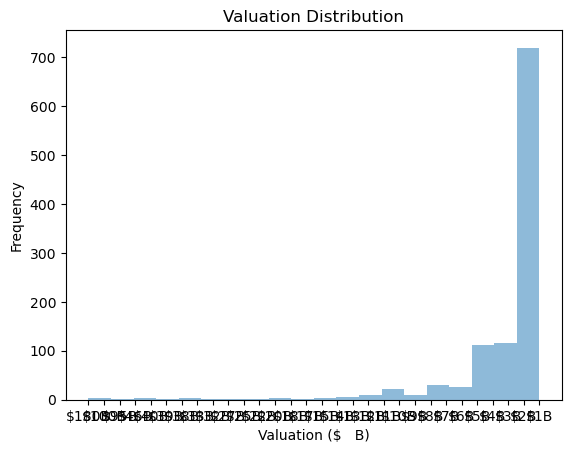

In [45]:
#Lets try to plot a histogram from the above findings
plt.hist(Valuations, bins=20, alpha=0.5)
plt.title('Valuation Distribution')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

In [10]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Perfoming a Univariate Analysis

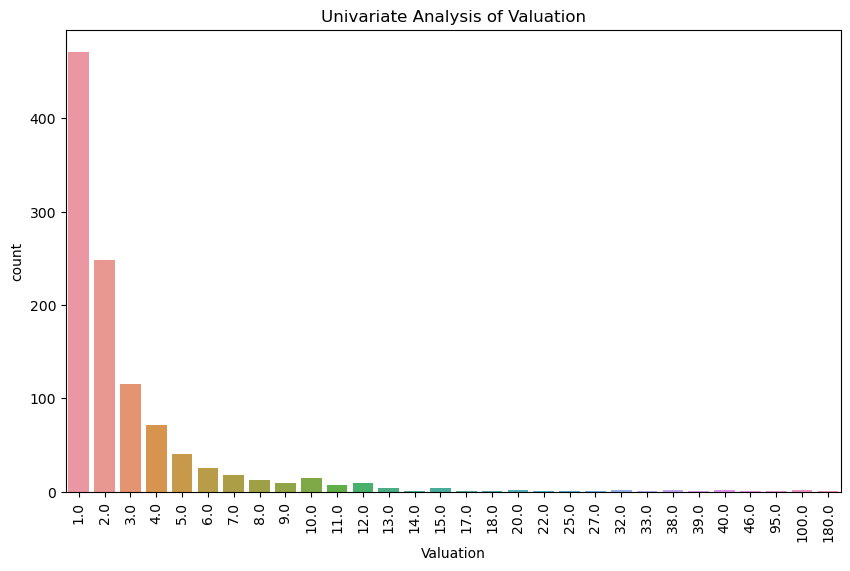

In [65]:
# Analysing one feature using the Investment column
# I ploted all the investment values in the x-axis and in the y-axis.
#I will have nothing but would be like all the values are zero in the y-axis
# Univariate Analysis on 'Valuation'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Valuation')
plt.title('Univariate Analysis of Valuation')
plt.xticks(rotation=90)
plt.show()


### A summary of the Univariate analysis
**Valuation Ranges**: The x-axis shows different valuation ranges in billions of dollars.

**Frequency Count**: The y-axis indicates the count of companies falling within each valuation range.

**Most Common Range**: The most populated range is 0-10, with over 400 companies having valuations within this bracket.

**Distribution Pattern**: As the valuation increases, the frequency count decreases, which is typical for many economic datasets. This histogram is useful for quickly assessing the most common valuation ranges among the sampled companies and understanding the overall distribution pattern.

### Performing a Bivariate Analysis

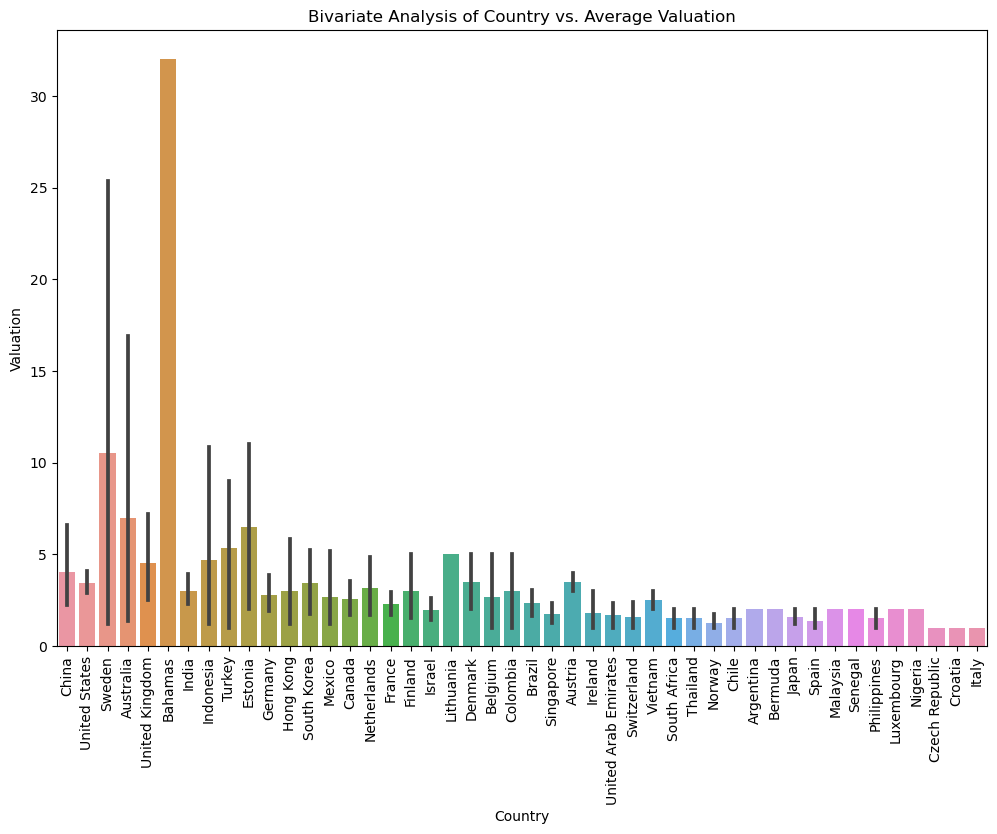

In [66]:
# Two features are analysed. So I worked on Countries and Cities. 
# Bivariate Analysis on 'Country' and 'Valuation'
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Country', y='Valuation', estimator=np.mean)
plt.title('Bivariate Analysis of Country vs. Average Valuation')
plt.xticks(rotation=90)
plt.show()


### A summary of the Bivariate analysis of the dataset;
**Countries Compared**: The graph includes a variety of countries, with each country represented on the x-axis.

**Valuation Metric**: The y-axis measures the average valuation of companies in billions of dollars.

**United States’ Valuation**: The bar for the United States is notably higher than that of other countries, indicating a significantly higher average valuation.

**Other Countries**: China and Saudi Arabia also have notable valuations, though much lower than the United States, while other countries have relatively lower valuations. This analysis helps in understanding the economic standing and market value of companies within these countries. The United States’ towering bar suggests a dominant economic position in terms of company valuations.

### Multivariate Analysis on the Dataset

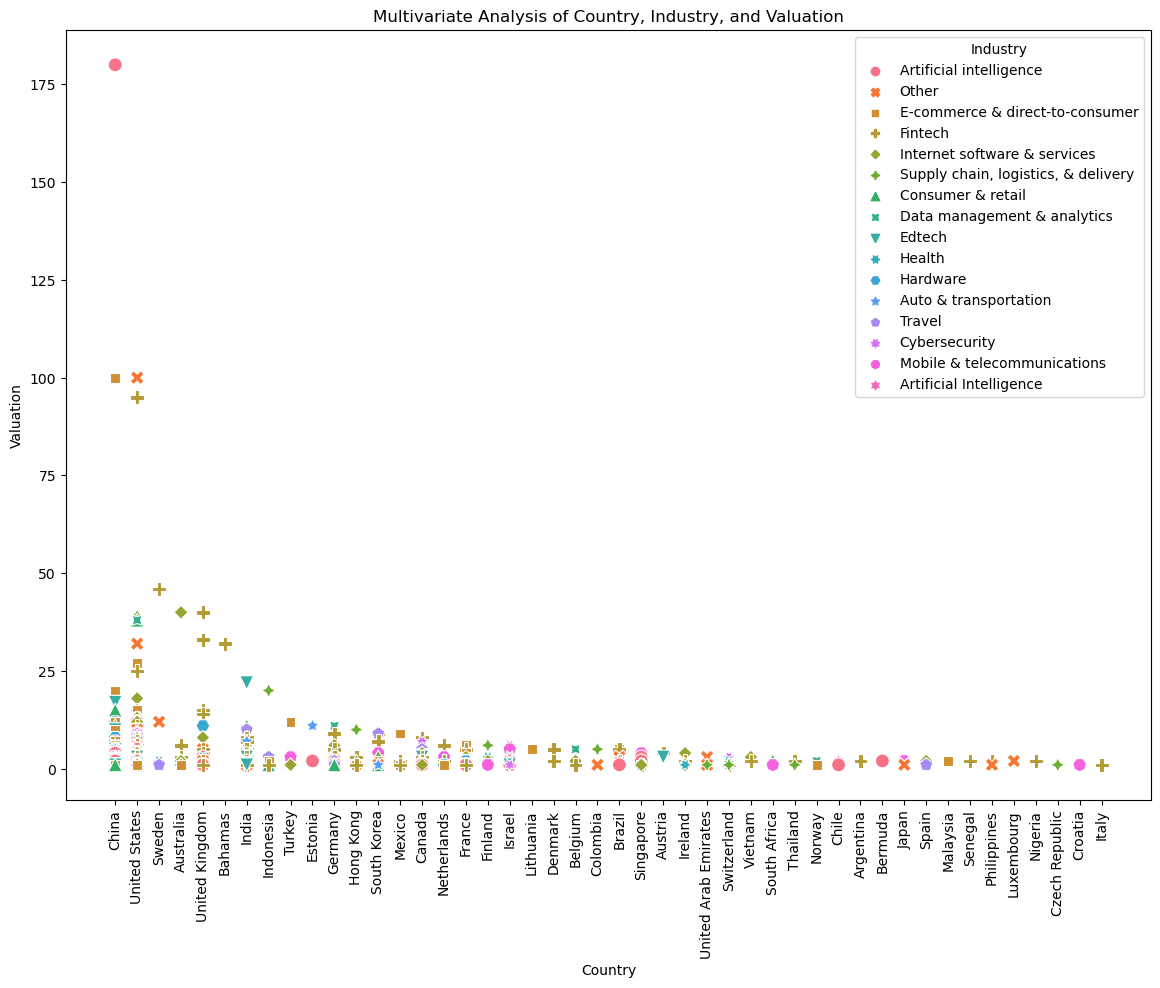

In [67]:
# Multivariate Analysis on 'Country', 'Industry', and 'Valuation'
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Country', y='Valuation', hue='Industry', style='Industry', s=100)
plt.title('Multivariate Analysis of Country, Industry, and Valuation')
plt.xticks(rotation=90)
plt.show()


### A summary of the Multivariate analysis above;
**Countries & Valuation**: The x-axis lists different countries, and the y-axis shows company valuations in billions.
Industry Representation: Distinct symbols and colors represent various industries, such as Artificial Intelligence, E-commerce, Fintech, etc.
**Data Distribution**: Most data points are clustered towards the lower end of the valuation scale, indicating that a majority of companies have valuations on the lower side.
**Outliers**: There is an outlier in the Artificial Intelligence industry with a very high valuation, significantly above others.